# CLASSIFICATION

In [15]:
# import dataset
from sklearn.datasets import load_iris
li=load_iris()
x=li.data
y=li.target

In [2]:
# normalization
from sklearn.preprocessing import MinMaxScaler
ss=MinMaxScaler()
x1=ss.fit_transform(x)

In [3]:
# encoding
import numpy as np
# xarr=np.array(x)
# xnew=xarr.reshape(-1,1)
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
enc=encoder.fit_transform(y[:,np.newaxis]).toarray()
enc=enc.astype('int')
enc

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [4]:
# split dataset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x1,enc,test_size=0.2)

In [5]:
# create deep neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import softmax
model=Sequential()
model.add(Dense(4,activation='relu',input_dim=4))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy')

# train the model
model.fit(xtrain,ytrain,epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 14ms/step - loss: 1.0762
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 1.0614
Epoch 3/200
4/4 [==============================] - 0s 6ms/step - loss: 1.0510
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 1.0419
Epoch 5/200
4/4 [==============================] - 0s 9ms/step - loss: 1.0329
Epoch 6/200
4/4 [==============================] - 0s 6ms/step - loss: 1.0241
Epoch 7/200
4/4 [==============================] - 0s 6ms/step - loss: 1.0153
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 1.0065
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 0.9976
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 0.9887
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 0.9795
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 0.9708
Epoch 13/200
4/4 [==============================] - 0s 5ms/s

In [6]:
# make prediction
ypred=model.predict(xtest)

1/1 [==============================] - 0s 141ms/step


In [7]:
# softmax will give output as probability. higest probability, given '1' else '0'
for i in range(len(ypred)):
    j=np.argmax(ypred[i,:])   # argmax returns the index of mximum value
    ypred[i,0]=0
    ypred[i,1]=0
    ypred[i,2]=0
    ypred[i,j]=1

In [8]:
ypred.astype('int')

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [9]:
# check accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.9

In [10]:
from sklearn.metrics import precision_score
# precision_score([1,0,0],[0,1,1])
precision_score([1,0,0],[1,1,1]) # 1/3

0.3333333333333333

In [11]:
# to calculate the precision value of whole output
sum=0
for i in range(len(ypred)):
    a=precision_score(ytest[i],ypred[i])
    sum=sum+a
sum=sum/len(ypred)
sum

0.9

In [12]:
from sklearn.metrics import recall_score
sum=0
for i in range(len(ypred)):
    a=recall_score(ytest[i],ypred[i])
    sum+=a
sum/=len(ypred)
sum

0.9

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 864x432 with 0 Axes>

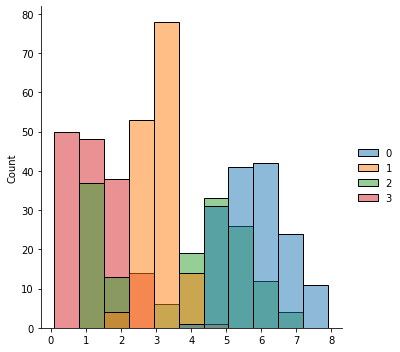

In [17]:
plt.figure(figsize=(12,6))
sns.displot(data=x)

<Figure size 864x432 with 0 Axes>

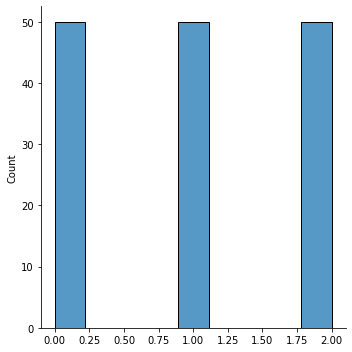

In [18]:
plt.figure(figsize=(12,6))
sns.displot(data=y)

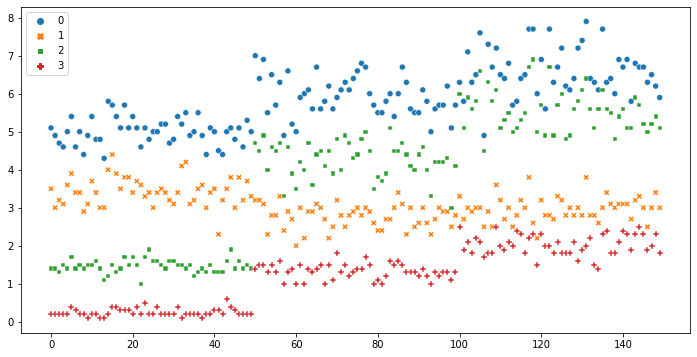

In [19]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=x)

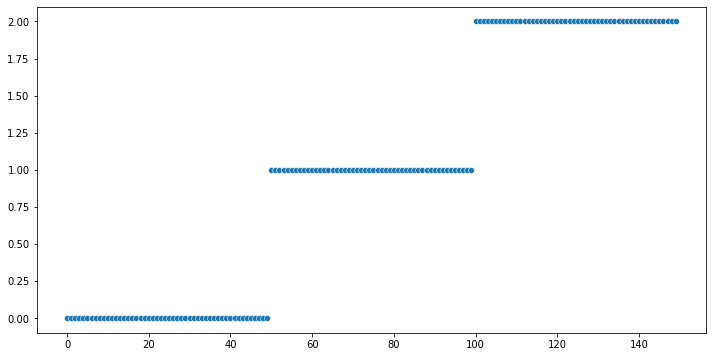

In [20]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=y)